In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install git+https://github.com/DoDoron/moms_apriltag.git
!pip install imageio
!pip install opencv_camera

  Cloning https://github.com/DoDoron/moms_apriltag.git to /tmp/pip-req-build-7sgmoz9x
  Running command git clone --filter=blob:none --quiet https://github.com/DoDoron/moms_apriltag.git /tmp/pip-req-build-7sgmoz9x
  Resolved https://github.com/DoDoron/moms_apriltag.git to commit e2e343f8473f3058bc6d95ca47d764a4094bbf0b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for moms_apriltag: filename=moms_apriltag-2023.1.15-py3-none-any.whl size=1338135 sha256=969d63f6100efb2e4c52d9689c927e22f4f4e53df604c52575db6dc2b38bcfa0
  Stored in directory: /tmp/pip-ephem-wheel-cache-3cgx1091/wheels/b4/80/a6/eccfc03a438ab6cf08fd6a6c116e0a44fd892bb1fbe1fa30f8
Successfully built moms_apriltag


In [3]:
import moms_apriltag
print(moms_apriltag.__file__)

/usr/local/lib/python3.10/dist-packages/moms_apriltag/__init__.py


In [4]:
import numpy as np
import cv2
import cv2.aruco as aruco
from matplotlib import pyplot as plt
import imageio # save the target board to a file for printing
from pathlib import Path
from opencv_camera import __version__ as ocv_version
from opencv_camera import StereoCamera
from opencv_camera import coverage
from opencv_camera import visualizeDistortion
from opencv_camera import mosaic
print("OpenCV Camera:", ocv_version)

from moms_apriltag import ApriltagBoard # generate a target board
from moms_apriltag import ApriltagStereoCalibration
from moms_apriltag import ApriltagDrawer
from moms_apriltag import ApriltagCameraCalibration

# from math import asin, atan2,pi
from colorama import Fore

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

OpenCV Camera: 2023.1.7


## AprilTag generation

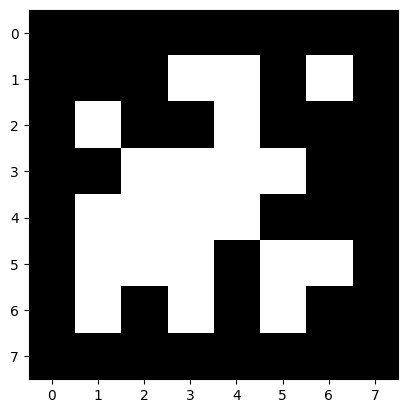

In [5]:
# for AprilTag v2
from moms_apriltag import TagGenerator2
from matplotlib import pyplot as plt

tg = TagGenerator2("tag36h10")
tag = tg.generate(4)

plt.imshow(tag, cmap="gray")

## AprilTag Generation

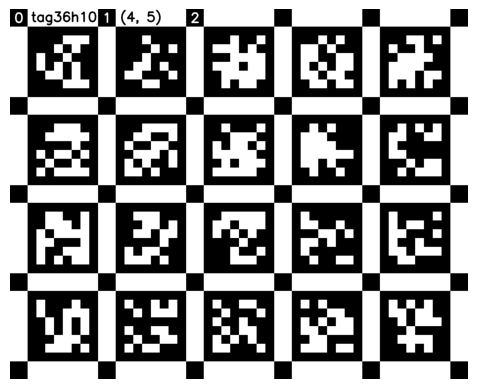

In [6]:
board = ApriltagBoard.create(4,5,"tag36h10", 0.02)
tgt = board.board

plt.imshow(tgt, cmap="gray")
plt.axis("off");

# Camera Calibration

### AprilTag 검출

Total tags found 20, tag ids:
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 


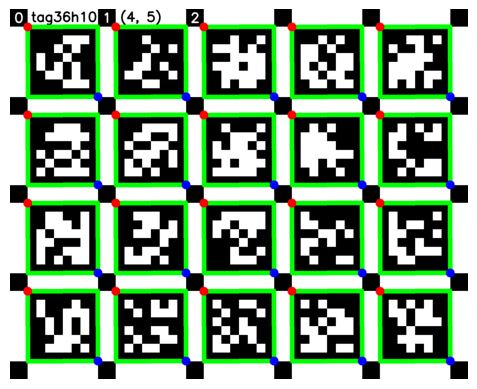

In [7]:
def find(img):
    corners, ids, rejectedImgPts = aruco.detectMarkers(
        img,
        aruco.getPredefinedDictionary(aruco.DICT_APRILTAG_36h10),
        parameters=aruco.DetectorParameters(),
    )

    # turn the detections into a list of Tags and draw them on the image
    at = ApriltagDrawer()
    img = at.draw(img, ids, corners, mark=False)

    ids = ids.flatten()
    ids = sorted(ids)
    print(f"Total tags found {len(ids)}, tag ids:")
    for i in range(4*5):
        if i in ids:
            print(i, end=" ")
        else:
            print(f"{Fore.RED}X{Fore.RESET}", end=" ")
    print("")
    return img

img = find(tgt)
plt.imshow(img)
plt.axis("off");

### image load

In [8]:
path = Path("/content/drive/MyDrive/apriltag_image/")
files = list(path.rglob("*.jpg"))

imgs = [cv2.imread(str(f), 0) for f in files]  # 이미지를 흑백으로 읽음

print(f"{len(imgs)} images found")

15 images found


### calibration

In [11]:
cal = ApriltagCameraCalibration()
cameraModel = cal.calibrate(imgs, board)

### calibration resut

In [12]:
print("Camera matrix:\n", cameraModel["K"])
print("Distortion coefficients:\n", cameraModel["d"])

Camera matrix:
 [[2686.63     0.    1489.729]
 [   0.    2680.023 2020.76 ]
 [   0.       0.       1.   ]]
Distortion coefficients:
 [[ 0.12  -0.522 -0.002  0.001  0.468]]
